In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Illinois State Board of Elections(https://www.elections.il.gov/ElectionOperations/ElectionVoteTotals.aspx)

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The following counties used maps sourced from the respective county governments instead: DuPage, Kane, Kendall, Will.

Some counties used the Census Redistricting shapefiles as a starting point, but were corrected using PDF maps to reverse changes made since 2016. These include Champaign, Greene, Hancock, Kane, Knox, LaSalle, Lawrence, Mason, St. Clair, Will, and Winnebago Counties.

Countywide votes were distributed for Coles, Knox, Macon, McDonough, Tazewell. It was just a single vote in each of Knox, Macon, Tazewell; 3 votes in McDonough; and 30 votes in Coles.

The SBOE results do not include write-in votes by precinct for 42 counties. For these counties the write-in votes by precinct are transcribed from the official county or city canvass reports.

- G16PREDCLI - Hillary Clinton (Democratic Party)
- G16PRERTRU - Donald J. Trump (Republican Party)
- G16PRELJOH - Gary Johnson (Libertarian Party)
- G16PREGSTE - Jill Stein (Green Party)
- G16PREOWRI - Write-in Votes


- G16USSDDUC - Tammy Duckworth (Democratic Party)
- G16USSRKIR - Mark Steven Kirk (Republican Party)
- G16USSLMCM - Kenton McMillen (Libertarian Party)
- G16USSGSUM - Scott Summers (Green Party)
- G16USSOWRI - Write-in Votes


- G16COMDMEN - Susana Mendoza (Democratic Party)
- G16COMRMUN - Leslie Geissler Munger (Republican Party)
- G16COMLBAL - Claire Ball (Libertarian Party)
- G16COMGCUR - Tim Curtin (Green Party)


## Load VEST's Final File

In [3]:
vest_shp = gp.read_file("./raw-from-source/VEST/il_2016/il_2016.shp")

In [4]:
vest_shp.shape

(10090, 17)

In [5]:
vest_shp.head(1)

,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI,G16USSDDUC,G16USSRKIR,G16USSLMCM,G16USSGSUM,G16USSOWRI,G16COMDMEN,G16COMRMUN,G16COMLBAL,G16COMGCUR,geometry
0,001,CLAYTON 1,76,359,10,1,2,175,260,5,7,0,117,299,10,9,"POLYGON Z ((-91.03099 40.01947 0.00000, -91.03..."


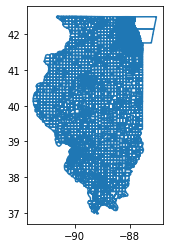

In [6]:
vest_shp.boundary.plot()

# Loading, Combining Election Results

## Load County Fips File

In [7]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Presidential Results

In [11]:
pres_results = pd.read_csv('./raw-from-source/SOS/51-120-PRESIDENT AND VICE PRESIDENT-2016GE.csv')
pres_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,87,0,STARK,150,DONALD J. TRUMP,120,PRESIDENT AND VICE PRESIDENT,GOSHEN,516,12,REPUBLICAN,237
1,87,0,STARK,150,DONALD J. TRUMP,120,PRESIDENT AND VICE PRESIDENT,VALLEY,196,12,REPUBLICAN,111
2,54,0,LOGAN,5010,JILL STEIN,120,PRESIDENT AND VICE PRESIDENT,EAST LINCOLN 5,1158,13,GREEN,8
3,54,0,LOGAN,5010,JILL STEIN,120,PRESIDENT AND VICE PRESIDENT,WEST LINCOLN 2,512,13,GREEN,4
4,54,0,LOGAN,5015,GARY JOHNSON,120,PRESIDENT AND VICE PRESIDENT,AETNA,346,19,LIBERTARIAN,10


In [12]:
pres_results = pres_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
pres_results.reset_index(inplace = True)
pres_results.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                                 VoteCount               \
ContestName   PRESIDENT AND VICE PRESIDENT                
CandidateName              DONALD J. TRUMP GARY JOHNSON   
0                                    150.0          2.0   
1                                    455.0          9.0   
2                                    331.0         12.0   
3                                    376.0          9.0   
4                                    359.0         10.0   

                                                                            
ContestName                                                                 
CandidateName HILLARY RODHAM CLINTON JILL STEIN WRITE-IN Write-In Write-in  
0                               18.0        1.0      NaN      NaN      NaN  
1                               60.0        3.0      NaN      NaN      NaN  
2                               69.0        3.0      NaN      NaN      NaN  
3                               47.0        2.0      NaN      NaN      NaN  
4                               76.0        1.0      NaN      NaN      NaN

In [13]:
pres_results.columns = ['JurisdictionID','JurisName','PrecinctName','G16PRERTRU','G16PRELJOH','G16PREDCLI','G16PREGSTE','wi1','wi2','wi3']
pres_results.head()

,JurisdictionID,JurisName,PrecinctName,G16PRERTRU,G16PRELJOH,G16PREDCLI,G16PREGSTE,wi1,wi2,wi3
0,1,ADAMS,BEVERLY,150.0,2.0,18.0,1.0,NaN,NaN,NaN
1,1,ADAMS,BURTON,455.0,9.0,60.0,3.0,NaN,NaN,NaN
2,1,ADAMS,CAMP POINT PCT 1,331.0,12.0,69.0,3.0,NaN,NaN,NaN
3,1,ADAMS,CAMP POINT PCT 2,376.0,9.0,47.0,2.0,NaN,NaN,NaN
4,1,ADAMS,CLAYTON,359.0,10.0,76.0,1.0,NaN,NaN,NaN


In [17]:
pres_results['G16PREOWRI'] = pres_results.fillna(0)['wi1'] + pres_results.fillna(0)['wi2'] + pres_results.fillna(0)['wi3']
pres_results['G16PREOWRI'].sum()

50269.0

In [18]:
pres_results.drop(columns = ['wi1','wi2','wi3'], inplace = True)

## U.S. Senate Results

In [19]:
uss = pd.read_csv('./raw-from-source/SOS/51-160-UNITED STATES SENATOR-2016GE.csv')
uss = uss.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
uss.reset_index(inplace = True)
uss.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                          VoteCount                                 \
ContestName   UNITED STATES SENATOR                                  
CandidateName       KENTON McMILLEN MARK STEVEN KIRK SCOTT SUMMERS   
0                               0.0            111.0           2.0   
1                              15.0            336.0           6.0   
2                              12.0            267.0           9.0   
3                               7.0            296.0           6.0   
4                               5.0            260.0           7.0   

                                                          
ContestName                                               
CandidateName TAMMY DUCKWORTH WRITE-IN Write-In Write-in  
0                        53.0      NaN      NaN      NaN  
1                       170.0      NaN      NaN      NaN  
2                       118.0      NaN      NaN      NaN  
3                       118.0      NaN      NaN      NaN  
4                       175.0      NaN      NaN      NaN

In [20]:
uss.columns = ['JurisdictionID','JurisName','PrecinctName','G16USSLMCM','G16USSRKIR','G16USSGSUM','G16USSDDUC','wi1','wi2','wi3']
uss['G16USSOWRI'] = uss.fillna(0)['wi1'] + uss.fillna(0)['wi2'] + uss.fillna(0)['wi3']
uss['G16USSOWRI'].sum()

4998.0

In [21]:
uss.drop(columns = ['wi1','wi2','wi3'], inplace = True)
uss.head()

,JurisdictionID,JurisName,PrecinctName,G16USSLMCM,G16USSRKIR,G16USSGSUM,G16USSDDUC,G16USSOWRI
0,1,ADAMS,BEVERLY,0.0,111.0,2.0,53.0,0.0
1,1,ADAMS,BURTON,15.0,336.0,6.0,170.0,0.0
2,1,ADAMS,CAMP POINT PCT 1,12.0,267.0,9.0,118.0,0.0
3,1,ADAMS,CAMP POINT PCT 2,7.0,296.0,6.0,118.0,0.0
4,1,ADAMS,CLAYTON,5.0,260.0,7.0,175.0,0.0


## Comptroller Results

In [22]:
com_results = pd.read_csv('./raw-from-source/SOS/51-210-COMPTROLLER-2016GE.csv')
com_results = com_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
com_results.reset_index(inplace = True)
com_results.head()

JurisdictionID JurisName      PrecinctName   VoteCount  \
ContestName                                              COMPTROLLER   
CandidateName                                            CLAIRE BALL   
0                          1     ADAMS           BEVERLY         3.0   
1                          1     ADAMS            BURTON        14.0   
2                          1     ADAMS  CAMP POINT PCT 1         9.0   
3                          1     ADAMS  CAMP POINT PCT 2        10.0   
4                          1     ADAMS           CLAYTON        10.0   

                                                                
ContestName                                                     
CandidateName LESLIE GEISSLER MUNGER SUSANA MENDOZA TIM CURTIN  
0                              118.0           40.0        4.0  
1                              382.0          113.0        7.0  
2                              294.0           94.0       12.0  
3                              309.0           97.0        7.0  
4                              299.0          117.0        9.0

In [23]:
com_results.columns = ['JurisdictionID','JurisName','PrecinctName','G16COMLBAL','G16COMRMUN','G16COMDMEN','G16COMGCUR']
com_results.head()

,JurisdictionID,JurisName,PrecinctName,G16COMLBAL,G16COMRMUN,G16COMDMEN,G16COMGCUR
0,1,ADAMS,BEVERLY,3.0,118.0,40.0,4.0
1,1,ADAMS,BURTON,14.0,382.0,113.0,7.0
2,1,ADAMS,CAMP POINT PCT 1,9.0,294.0,94.0,12.0
3,1,ADAMS,CAMP POINT PCT 2,10.0,309.0,97.0,7.0
4,1,ADAMS,CLAYTON,10.0,299.0,117.0,9.0


## Combine Results

In [24]:
election_results = pres_results.merge(uss, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(com_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False)

In [25]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREDCLI', 'G16PREGSTE', 'G16PREOWRI',
       'JurisdictionID_y', 'G16USSLMCM', 'G16USSRKIR', 'G16USSGSUM',
       'G16USSDDUC', 'G16USSOWRI', 'JurisdictionID', 'G16COMLBAL',
       'G16COMRMUN', 'G16COMDMEN', 'G16COMGCUR'],
      dtype='object')

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(election_results[['JurisName']].drop_duplicates())

                    JurisName
0                       ADAMS
74                  ALEXANDER
85                       BOND
111                     BOONE
150                     BROWN
164                    BUREAU
215                   CALHOUN
222                   CARROLL
245                      CASS
267                 CHAMPAIGN
385                 CHRISTIAN
416                     CLARK
440                      CLAY
462                   CLINTON
501                     COLES
546                      COOK
2145                 CRAWFORD
2170               CUMBERLAND
2183                   DeKALB
2248                   DeWITT
2272                  DOUGLAS
2290                   DuPAGE
3159                    EDGAR
3191                  EDWARDS
3203                EFFINGHAM
3240                  FAYETTE
3271                     FORD
3294                 FRANKLIN
3329                   FULTON
3387                 GALLATIN
3398                   GREENE
3421                   GRUNDY
3462      

Going to only validate the election result totals for now, and not deal with assigning counties to cities that split counties and distributing county wide votes. 

# Validating Election Results

In [27]:
vest_shp.columns

Index(['COUNTYFP', 'NAME', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOWRI', 'G16USSDDUC', 'G16USSRKIR', 'G16USSLMCM',
       'G16USSGSUM', 'G16USSOWRI', 'G16COMDMEN', 'G16COMRMUN', 'G16COMLBAL',
       'G16COMGCUR', 'geometry'],
      dtype='object')

In [28]:
data_columns = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOWRI', 'G16USSDDUC', 'G16USSRKIR', 'G16USSLMCM',
       'G16USSGSUM', 'G16USSOWRI', 'G16COMDMEN', 'G16COMRMUN', 'G16COMLBAL',
       'G16COMGCUR']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G16PREDCLI is equal 	VEST: 3090729 	RDH: 3090729.0
G16PRERTRU is equal 	VEST: 2146015 	RDH: 2146015.0
G16PRELJOH is equal 	VEST: 209596 	RDH: 209596.0
G16PREGSTE is equal 	VEST: 76802 	RDH: 76802.0
G16PREOWRI has a difference of 16514.0 votes
	VEST: 66783 votes
	SOURCES: 50269.0 votes
G16USSDDUC is equal 	VEST: 3012940 	RDH: 3012940.0
G16USSRKIR is equal 	VEST: 2184692 	RDH: 2184692.0
G16USSLMCM is equal 	VEST: 175988 	RDH: 175988.0
G16USSGSUM is equal 	VEST: 117619 	RDH: 117619.0
G16USSOWRI has a difference of 1769.0 votes
	VEST: 6767 votes
	SOURCES: 4998.0 votes
G16COMDMEN is equal 	VEST: 2676244 	RDH: 2676244.0
G16COMRMUN is equal 	VEST: 2404723 	RDH: 2404723.0
G16COMLBAL is equal 	VEST: 187017 	RDH: 187017.0
G16COMGCUR is equal 	VEST: 144559 	RDH: 144559.0

All other races are equal


We expect these differences, because VEST notes that:
> The SBOE results do not include write-in votes by precinct for 42 counties. For these counties the write-in votes by precinct are transcribed from the official county or city canvass reports.

Write-in votes are also not reported on the [Election Results SOS page](https://www.elections.il.gov/ElectionOperations/ElectionVoteTotals.aspx?ID=MdSiWa1xQus%3d&OfficeType=%2brBqro%2b%2bHTUkQvv7Q1tDdQ%3d%3d&T=637614273441665480). 

Checking [Ballotpedia](https://ballotpedia.org/Illinois_elections,_2016) and they also show incorrect write-in votes that are far below the SOS files that we downloaded. 

At this time we will not check the 42 counties that VEST is referring to. 